In [1]:
%load_ext autoreload
%autoreload 2

In [74]:
import sys
sys.path.append('src/')

import numpy as np
import matplotlib.pyplot as plt

from WADParser import open_wad_file
from WADViewer import WadViewer
from WADPlayer import MIDIPlayer
from mus2mid import Mus2Mid

In [75]:
w = open_wad_file('WADs/brigandine.wad')

2025-04-04 13:03:05.980 | INFO     | WADParser:__init__:41 - Found a DOOM PWAD.
2025-04-04 13:03:05.981 | INFO     | WADParser:_get_palette:116 - Palette extracted.
2025-04-04 13:03:05.982 | INFO     | WADParser:_parse_levels:156 - Found 1 level(s) in this WAD.
2025-04-04 13:03:05.983 | INFO     | WADParser:_parse_things:128 - DOOM THINGS loaded.
2025-04-04 13:03:06.119 | DEBUG    | WADParser:_parse_map:233 - (array([  0,   1,   5,  19,  23,  36,  37,  38,  52,  62,  83,  88,  91,
        97,  99, 102, 105, 108, 109, 114, 117, 120, 123, 126, 134, 136,
       141]), array([27969,    10,    11,     6,     8,    19,     2,     9,    16,
          23,     4,     3,     1,    84,    61,     1,     9,     1,
          15,    12,     5,    36,    25,    26,    29,     2,     9]))
2025-04-04 13:03:06.126 | INFO     | WADParser:_parse_by_markers:168 - No FLATS found in this WAD.
2025-04-04 13:03:06.127 | INFO     | WADParser:_parse_by_markers:168 - No SPRITES found in this WAD.
2025-04-04 13:03

In [76]:
viewer = WadViewer(w)

ValueError: Texture BROVINE not found in WAD.

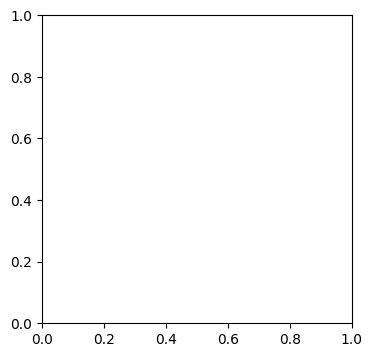

In [77]:
texs = list(w.textures.keys())

fig, ax = plt.subplots(figsize=(4, 4))
viewer.draw_tex('BROVINE', ax=ax)

2025-04-04 13:03:13.058 | INFO     | WADViewer:draw_map:95 - Plotted map MAP01.


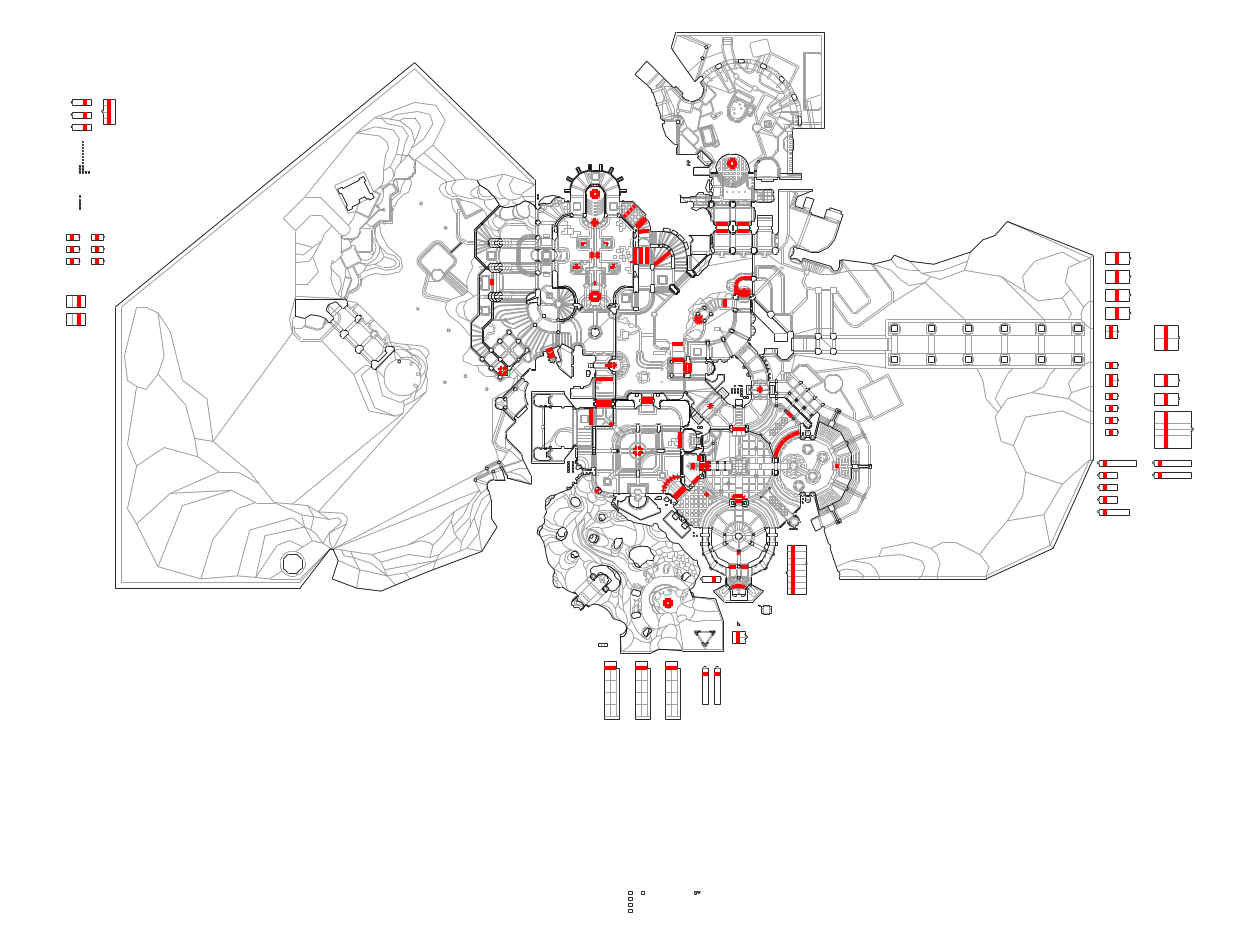

In [78]:

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
viewer.draw_map('MAP01', palette='OMGIFOL', show_secret=False, ax=ax)

In [ ]:
w.save_mus('D_E1M3')
m2m = Mus2Mid('output/D_E1M3.mus')
m2m.to_midi('output/D_E1M3.mid')


2025-03-30 20:44:45.024 | INFO     | mus2mid:__init__:70 - File format: b'MUS\x1a'
2025-03-30 20:44:45.042 | INFO     | mus2mid:mus2mid:217 - Track size written: 30033 vs 19246
2025-03-30 20:44:45.043 | INFO     | mus2mid:to_midi:223 - Exported MUS output/D_E1M3.mus as a MIDI file to output/D_E1M3.mid.


In [ ]:
player = MIDIPlayer('output/D_E1M3.mid')
player.play()

In [ ]:
player.stop()

AttributeError: 'NoneType' object has no attribute 'keys'

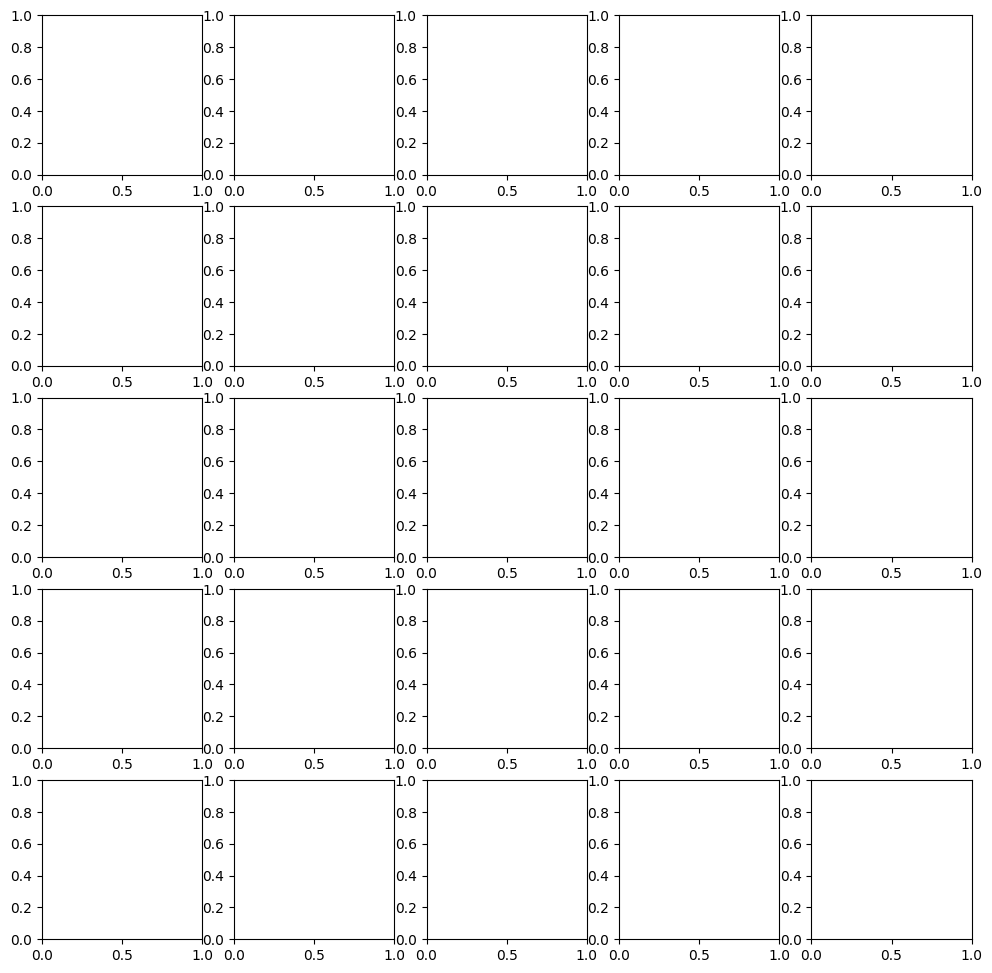

In [6]:
n_flats = 25
fig, ax = plt.subplots(5, 5, figsize=(12, 12))
ax = ax.ravel()

all_flat_names = list(w.flats.keys())
selected_flats = np.random.choice(all_flat_names, size=n_flats, replace=False)

for i, flat_name in enumerate(selected_flats):

    viewer.draw_flat(flat_name, ax=ax[i])
    ax[i].set_title(flat_name)
    ax[i].axis('off')

fig.suptitle('Randomly selected flats')
fig.tight_layout(pad=1.2)

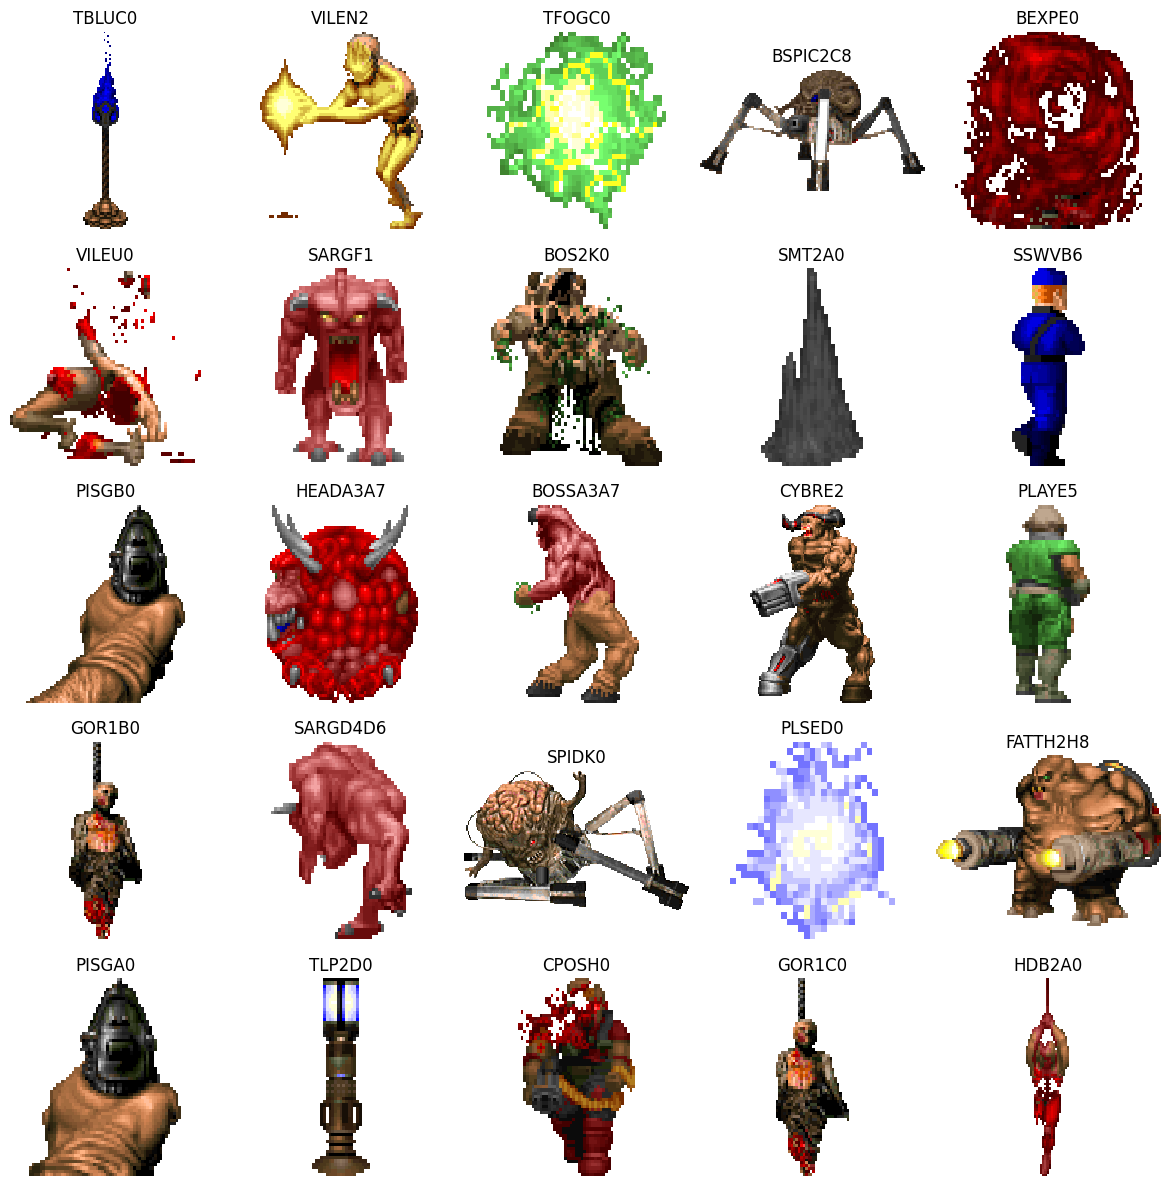

In [6]:
n_sprites = 25
fig, ax = plt.subplots(5, 5, figsize=(12, 12))
ax = ax.ravel()

all_sprite_names = list(w.sprites.keys())
selected_sprites = np.random.choice(all_sprite_names, size=n_sprites, replace=False)

for i, sprite_name in enumerate(selected_sprites):

    rgb_image = w.draw_patch(*w.sprites[sprite_name])

    # Original DOOM had non-square pixels!
    ax[i].imshow(rgb_image / 255, aspect=1.2, interpolation='nearest') 
    ax[i].set_title(sprite_name)
    ax[i].axis('off')

fig.tight_layout(pad=1.2)

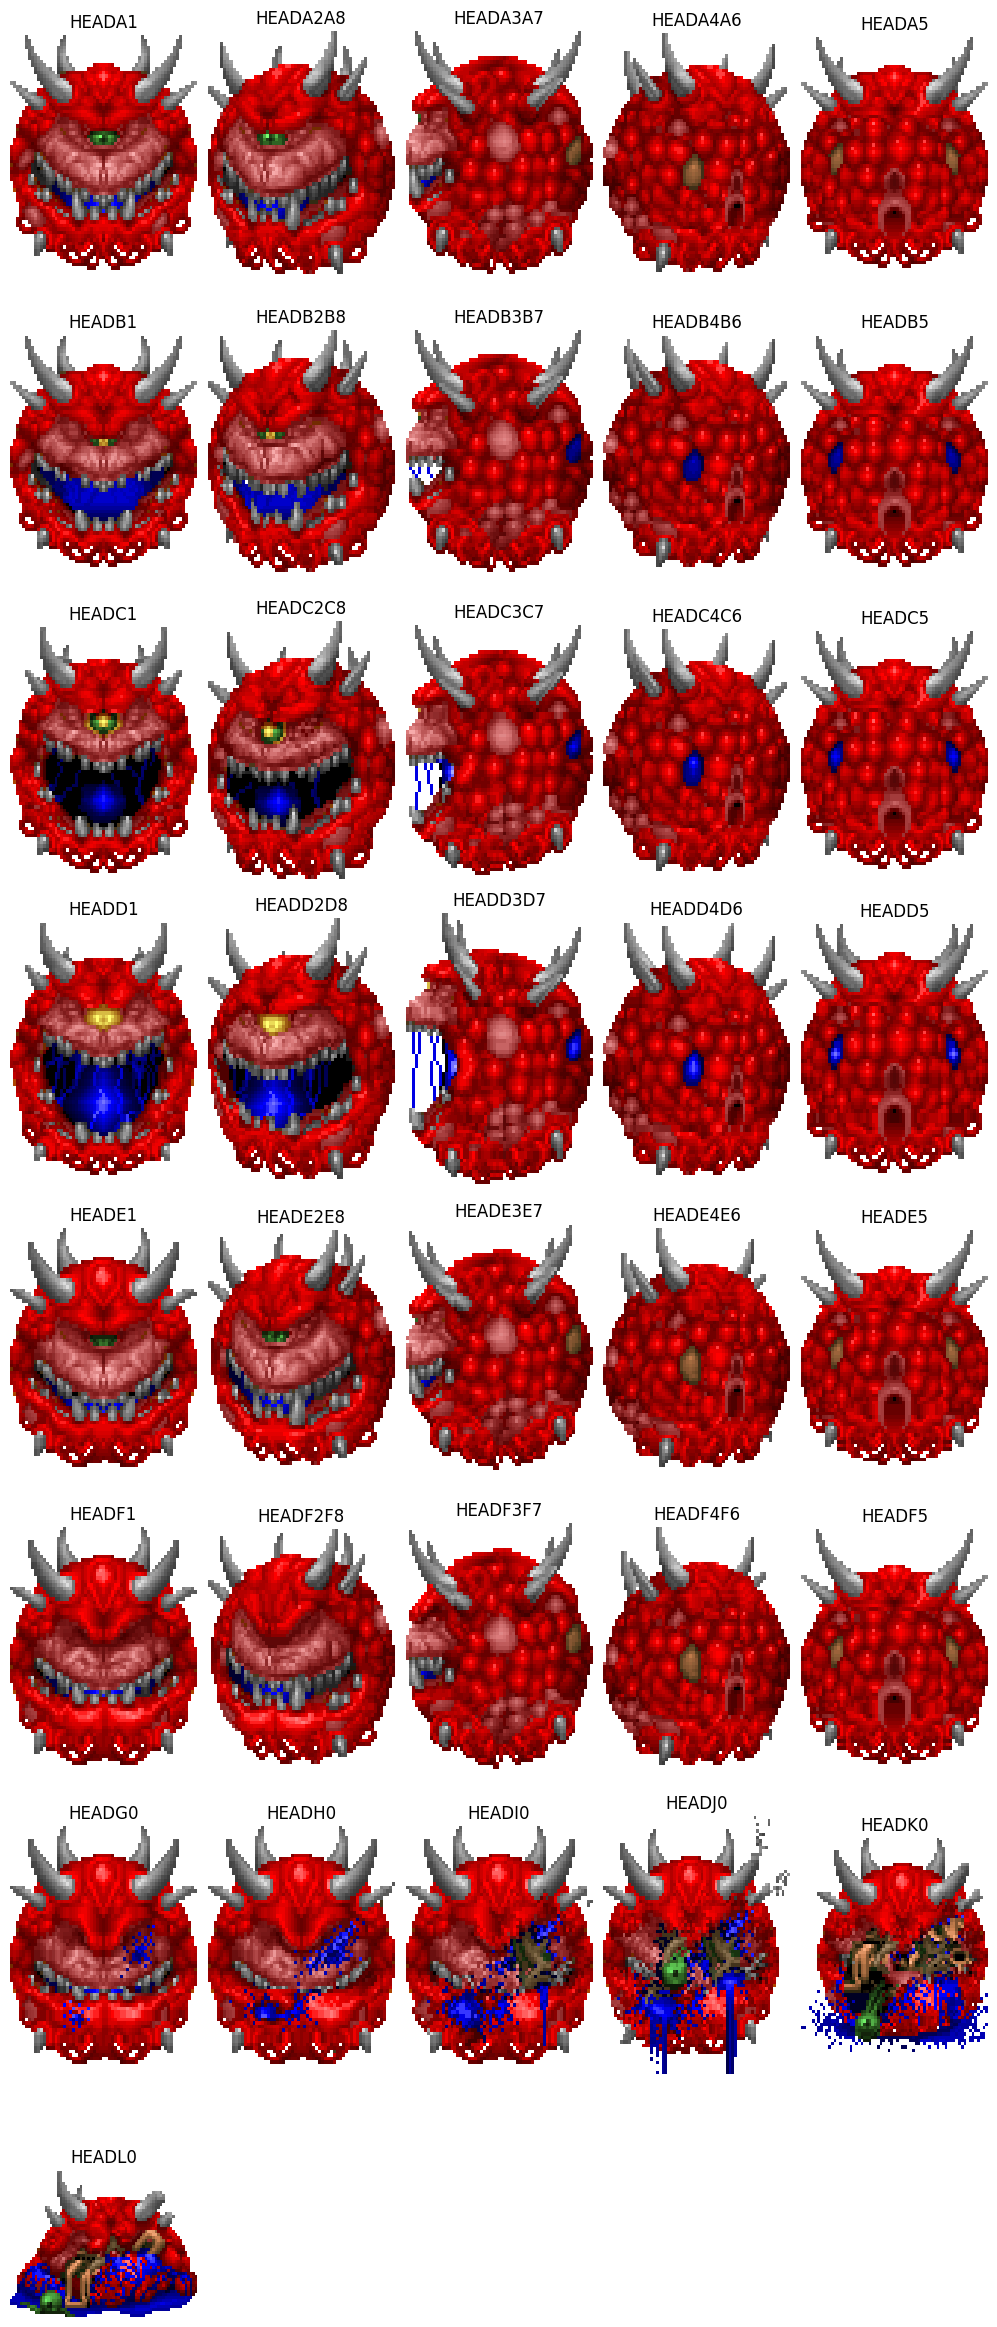

In [7]:
sprite_name = 'HEAD'

sprite_list = w.spritesheets[sprite_name]
ncols=5
nrows = int(np.ceil(len(sprite_list) / ncols))

fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(10, 3*nrows))
ax = ax.ravel()

for i, (name, offset, size) in enumerate(sprite_list):
    
    rgb_image = w.draw_patch(offset, size)
    ax[i].imshow(rgb_image / 255, aspect=1.2, interpolation='nearest')
    ax[i].set_title(name)
    ax[i].axis('off')

[ax[i].set_visible(False) for i in range(len(sprite_list), len(ax))]
fig.tight_layout(pad=0.8)